In [2]:
import tensorflow as tf
import rioxarray as rxr
from tqdm import tqdm 
import xarray as xr 
import numpy as np 
from keras.models import load_model
from Model import grad_loss 
import pickle 

modelo_cargado = load_model('red/red_2022062100_2022122100_old_e80_BS8_822_RES_1.h5', custom_objects={'grad_loss': grad_loss})
modelo_cargado.summary()

with open('red/historial_2022062100_2022122100_old_e80_BS8_822_RES_1.pkl', 'rb') as file:
    history = pickle.load(file)

2.11.0
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 32, 32,   0           []                               
                                1)]                                                               
                                                                                                  
 conv3d (Conv3D)                (None, 3, 32, 32, 7  5472        ['input_1[0][0]']                
                                2)                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 3, 32, 32,   0           []                               
                                1)]                                                    

In [4]:
dem=xr.open_mfdataset("../Datos/dem/DEM_rep.nc")
dem

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 64)
Coordinates:
  * lat      (lat) float64 -60.88 -60.62 -60.38 -60.12 ... -13.62 -13.38 -13.12
  * lon      (lon) float64 -78.88 -78.62 -78.38 -78.12 ... -63.62 -63.38 -63.12
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 dask.array<chunksize=(192, 64), meta=np.ndarray>
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 2.2.2, released 2017/09/15
    history:             Tue Oct 17 19:47:12 2023: GDAL CreateCopy( /opt/djan...

In [105]:
mae_final = history['mae'][-1] 
mse_final = history['mse'][-1] 
print("mse_final: ",mse_final)
print("mae_final: ",mae_final)


mse_final:  0.0006597411120310426
mae_final:  0.01610117405653


In [101]:
optimizador_utilizado = modelo_cargado.optimizer.get_config()['name']
loss_utilizada = modelo_cargado.loss
metrics_utilizadas = modelo_cargado.metrics_names
lr_utilizado=modelo_cargado.optimizer.lr
epochs= len(history['loss'])

print("Optimizador utilizado:", optimizador_utilizado)
print("Función de pérdida (loss) utilizada:", loss_utilizada)
print("Métricas utilizadas:", metrics_utilizadas)
print("lR utilizado: ", lr_utilizado)
print("Épocas utilizadas: ", epochs)

Optimizador utilizado: Adam
Función de pérdida (loss) utilizada: <function grad_loss at 0x00000151C2756DD0>
Métricas utilizadas: ['loss', 'mse', 'mae', 'mape']
lR utilizado:  <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
Épocas utilizadas:  80


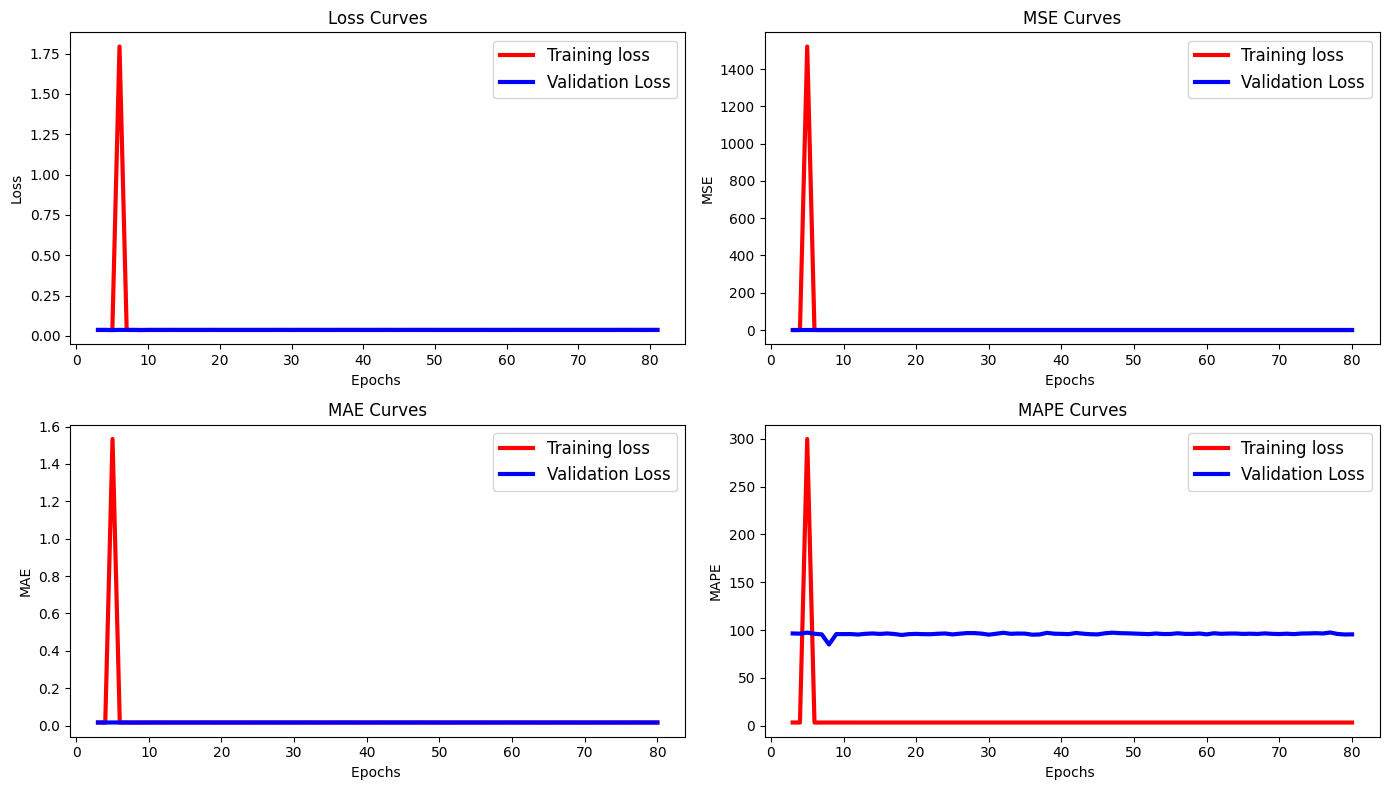

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0, 0].plot(np.arange(3,epochs+2), history['loss'][-(epochs - 1):],'r',linewidth=3.0)
axs[0, 0].plot(np.arange(3,epochs+2), history['val_loss'][-(epochs - 1):],'b',linewidth=3.0)
axs[0, 0].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

axs[0, 1].plot(np.arange(3,epochs+1),history['mse'][-(epochs - 2):],'r',linewidth=3.0)
axs[0, 1].plot(np.arange(3,epochs+1),history['val_mse'][-(epochs - 2):],'b',linewidth=3.0)
axs[0, 1].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

axs[1, 0].plot(np.arange(3,epochs+1),history['mae'][-(epochs - 2):],'r',linewidth=3.0)
axs[1, 0].plot(np.arange(3,epochs+1),history['val_mae'][-(epochs - 2):],'b',linewidth=3.0)
axs[1, 0].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

axs[1, 1].plot(np.arange(3,epochs+1),history['mape'][-(epochs - 2):],'r',linewidth=3.0)
axs[1, 1].plot(np.arange(3,epochs+1),history['val_mape'][-(epochs - 2):],'b',linewidth=3.0)
axs[1, 1].legend(['Training loss', 'Validation Loss'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [43]:
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_2.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_3.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('red/historial_2022062100_2022122100_old_e70_BS32_RES_4.pkl', 'rb') as file:
    history_3 = pickle.load(file)

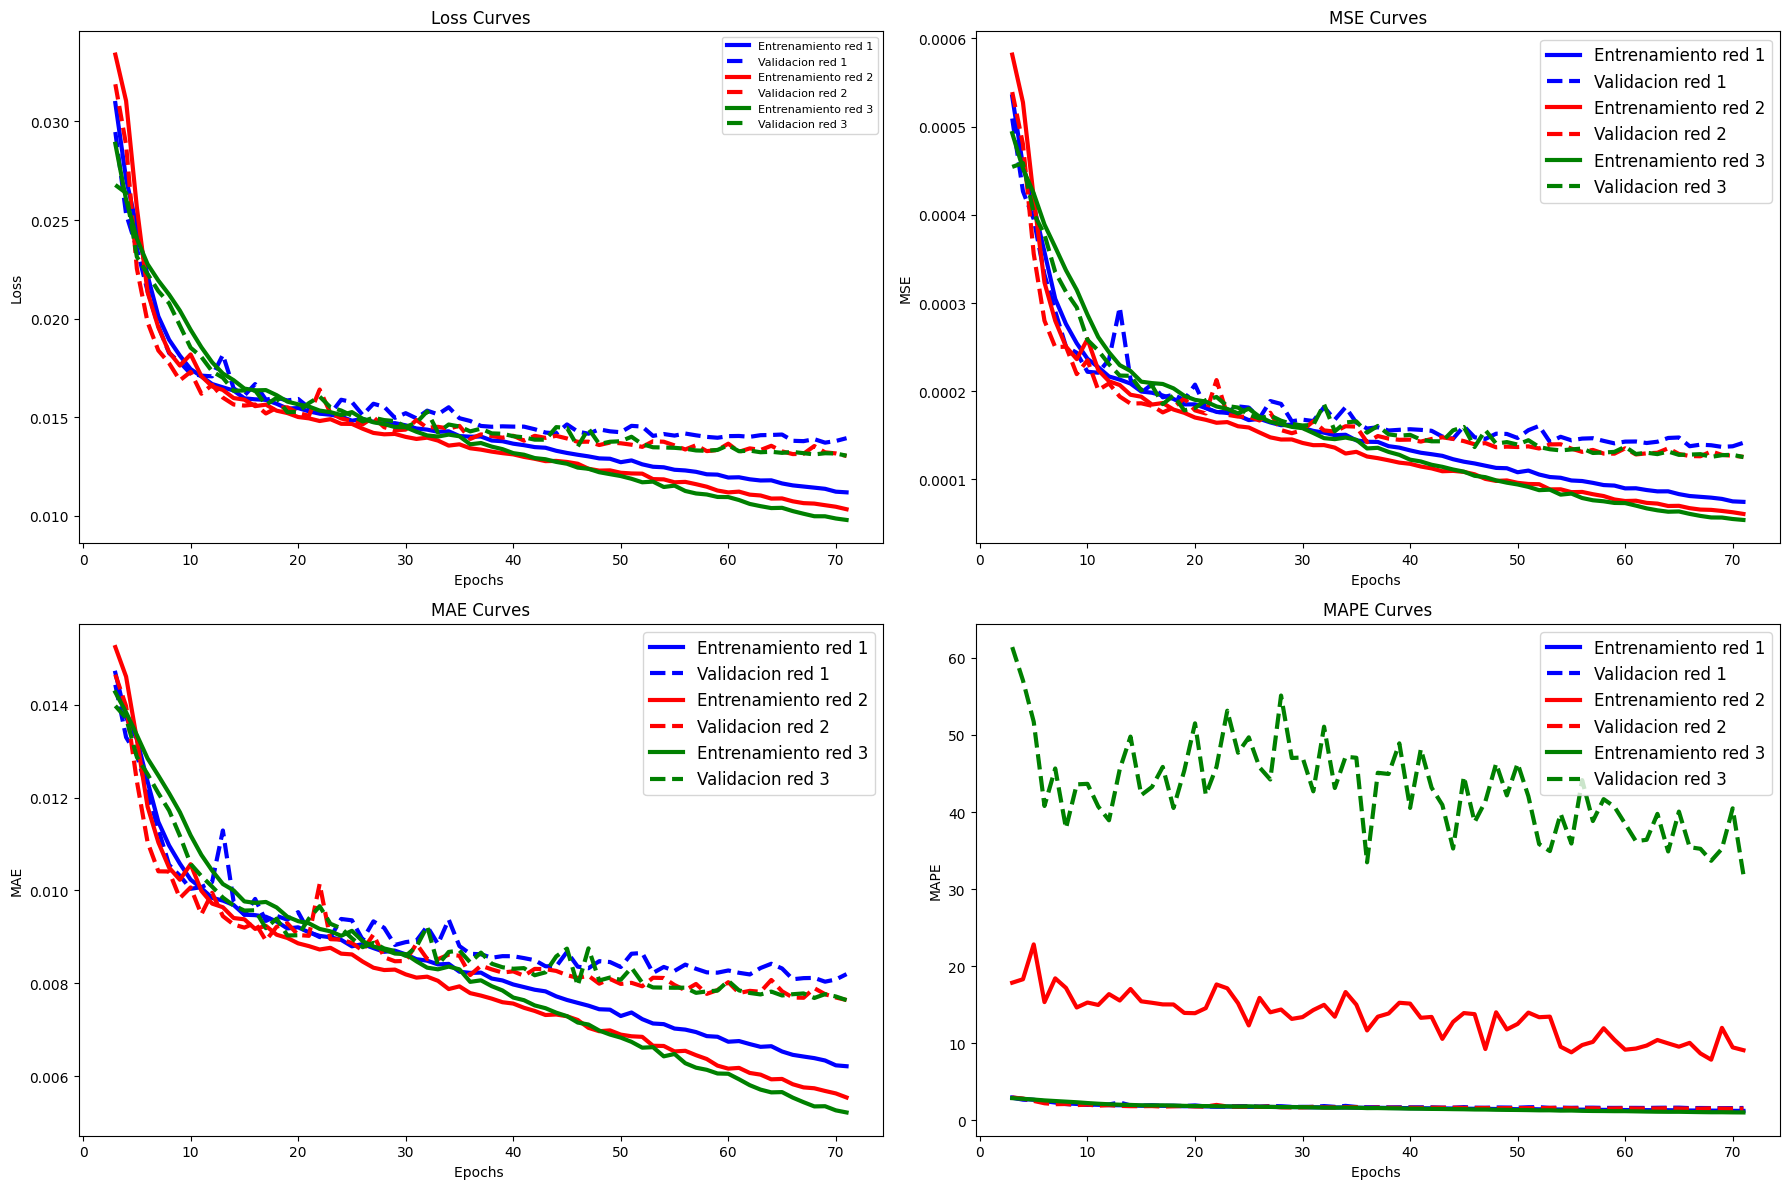

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

##plot 1##
axs[0, 0].plot(np.arange(3,epochs+2), history_1['loss'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_1['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 0].plot(np.arange(3,epochs+2), history_2['loss'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_2['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[0, 0].plot(np.arange(3,epochs+2), history_3['loss'][-(epochs - 1):],linewidth=3.0, color="green")
axs[0, 0].plot(np.arange(3,epochs+2), history_3['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[0, 0].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=8)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

##plot 2##
axs[0, 1].plot(np.arange(3,epochs+2), history_1['mse'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_1['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 1].plot(np.arange(3,epochs+2), history_2['mse'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_2['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[0, 1].plot(np.arange(3,epochs+2), history_3['mse'][-(epochs - 1):],linewidth=3.0, color="green")
axs[0, 1].plot(np.arange(3,epochs+2), history_3['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[0, 1].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

##plot 3##
axs[1, 0].plot(np.arange(3,epochs+2), history_1['mae'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_1['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 0].plot(np.arange(3,epochs+2), history_2['mae'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_2['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[1, 0].plot(np.arange(3,epochs+2), history_3['mae'][-(epochs - 1):],linewidth=3.0, color="green")
axs[1, 0].plot(np.arange(3,epochs+2), history_3['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[1, 0].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

##plot 4##
axs[1, 1].plot(np.arange(3,epochs+2), history_1['mape'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_1['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 1].plot(np.arange(3,epochs+2), history_2['mape'][-(epochs - 1):],linewidth=3.0, color="red", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_2['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")
axs[1, 1].plot(np.arange(3,epochs+2), history_3['mape'][-(epochs - 1):],linewidth=3.0, color="green")
axs[1, 1].plot(np.arange(3,epochs+2), history_3['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="green")

axs[1, 1].legend(['Entrenamiento red 1', 'Validacion red 1','Entrenamiento red 2', 'Validacion red 2', 'Entrenamiento red 3', 'Validacion red 3'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [86]:
with open('red/historial_2022062100_2022122100_old_e70_BS32_MAE_RES_3.pkl', 'rb') as file:
    history_mae = pickle.load(file)

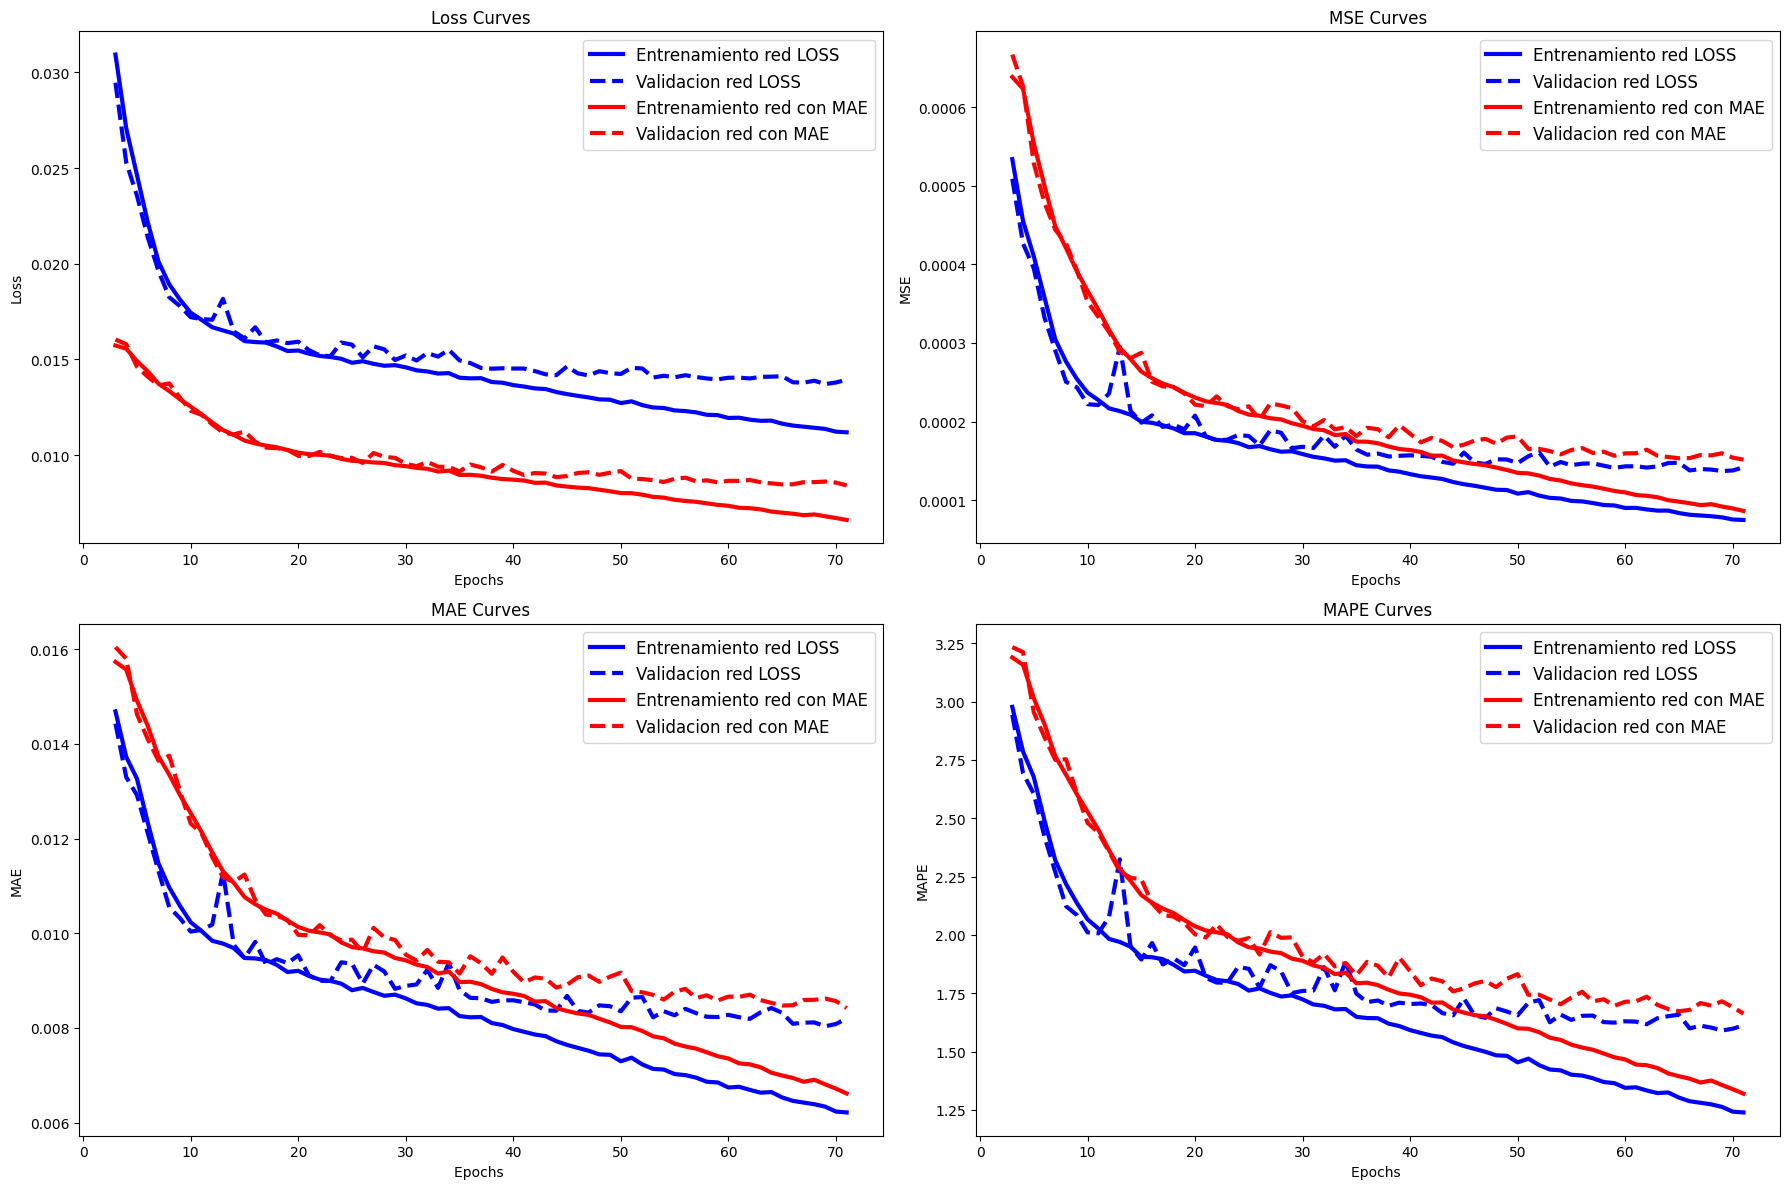

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

##plot 1##
axs[0, 0].plot(np.arange(3,epochs+2), history_1['loss'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 0].plot(np.arange(3,epochs+2), history_1['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 0].plot(np.arange(3,epochs+2), history_mae['loss'][-(epochs - 1):],linewidth=3.0, color="red")
axs[0, 0].plot(np.arange(3,epochs+2), history_mae['val_loss'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[0, 0].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[0, 0].set_xlabel('Epochs ',fontsize=10)
axs[0, 0].set_ylabel('Loss',fontsize=10)
axs[0, 0].set_title('Loss Curves',fontsize=12)

##plot 2##
axs[0, 1].plot(np.arange(3,epochs+2), history_1['mse'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[0, 1].plot(np.arange(3,epochs+2), history_1['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[0, 1].plot(np.arange(3,epochs+2), history_mae['mse'][-(epochs - 1):],linewidth=3.0, color="red")
axs[0, 1].plot(np.arange(3,epochs+2), history_mae['val_mse'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[0, 1].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[0, 1].set_xlabel('Epochs ',fontsize=10)
axs[0, 1].set_ylabel('MSE',fontsize=10)
axs[0, 1].set_title('MSE Curves',fontsize=12)

##plot 3##
axs[1, 0].plot(np.arange(3,epochs+2), history_1['mae'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 0].plot(np.arange(3,epochs+2), history_1['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 0].plot(np.arange(3,epochs+2), history_mae['mae'][-(epochs - 1):],linewidth=3.0, color="red")
axs[1, 0].plot(np.arange(3,epochs+2), history_mae['val_mae'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[1, 0].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[1, 0].set_xlabel('Epochs ',fontsize=10)
axs[1, 0].set_ylabel('MAE',fontsize=10)
axs[1, 0].set_title('MAE Curves',fontsize=12)

##plot 4##
axs[1, 1].plot(np.arange(3,epochs+2), history_1['mape'][-(epochs - 1):],linewidth=3.0, color="blue", label='a')
axs[1, 1].plot(np.arange(3,epochs+2), history_1['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="blue")
axs[1, 1].plot(np.arange(3,epochs+2), history_mae['mape'][-(epochs - 1):],linewidth=3.0, color="red")
axs[1, 1].plot(np.arange(3,epochs+2), history_mae['val_mape'][-(epochs - 1):], linestyle='--', linewidth=3.0, color="red")

axs[1, 1].legend(['Entrenamiento red LOSS', 'Validacion red LOSS','Entrenamiento red con MAE', 'Validacion red con MAE'],fontsize=12)
axs[1, 1].set_xlabel('Epochs ',fontsize=10)
axs[1, 1].set_ylabel('MAPE',fontsize=10)
axs[1, 1].set_title('MAPE Curves',fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
from functions import Data_nc as data_nc
import re 


g05=data_nc( fname="GFS0.5_t2m_heightAboveGround_instant_2022010100_*.nc", path="../Datos/GFS/2022_std")
g05.path_collection()
g05.loadVar()

era5=data_nc( fname="era5_2022*.nc", path="../Datos/ERA5/2022_std")
era5.path_collection()
era5.loadVar()

g05.upscaleVar(era5.values_t2m)


primer_dia=re.findall(r'\d+', g05.path_ncfiles[0])[-1] 
ultimo_dia=re.findall(r'\d+', g05.path_ncfiles[-1])[-1] 
intervalo= primer_dia + "_" + ultimo_dia
intervalo="2022062100_2022122100"


gfs_parches   = tf.convert_to_tensor(np.load("parches/gfs_"+intervalo+".npy"))
era5_parches  = tf.convert_to_tensor(np.load("parches/era5_"+intervalo+".npy"))
lat_parches   = tf.convert_to_tensor(np.load("parches/lat_"+intervalo+".npy"))
lon_parches   = tf.convert_to_tensor(np.load("parches/lon_"+intervalo+".npy"))
orog_parches  = tf.convert_to_tensor(np.load("parches/orog_"+intervalo+".npy"))
time1_parches = tf.convert_to_tensor(np.load("parches/time1_"+intervalo+".npy"))
time2_parches = tf.convert_to_tensor(np.load("parches/time2_"+intervalo+".npy"))

c:\Users\rlagos\anaconda3\envs\sivar\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [82]:
def combined_image(tensor_pic):
    positions = [(0, 0), (0, 32), 
             (32, 0), (32, 32), 
             (64, 0), (64, 32), 
             (96, 0), (96, 32), 
             (128, 0), (128, 32), 
             (160, 0), (160, 32), 
             (192, 0), (192, 32)]

    image_size = 32
    combined_image = np.zeros((6 * image_size, 2 * image_size), dtype=np.float32)

    for i,j in enumerate( range(12)):
        tensor_data = tensor_pic[j].numpy()  
        combined_image[ positions[i][0]:positions[i][0] + image_size,  positions[i][1]:positions[i][1] + image_size ] = tensor_data   

    return combined_image  

def output_plot(input_plot,observed,fore):
    residuals = observed - fore
    
    params = {'axes.titlesize':'9',
              'xtick.labelsize':'9',
              'ytick.labelsize':'9',
              'figure.figsize': (20,20),
              'figure.dpi': 200
              }
    #plt.figure(figsize=[16,16])
    plt.style.use('ggplot')
    plt.rcParams.update(params)

    i=4
    plt.subplot(141) #131
    plt.imshow(fore, vmin = np.min([fore,observed]), vmax = np.max([fore,observed]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('forecasted')

    plt.subplot(142) #132
    plt.imshow(residuals, vmin = np.min(residuals), vmax = np.max(residuals))
    plt.colorbar(orientation="vertical", fraction=0.047, pad=0.01)
    plt.title('residuals')


    plt.subplot(143) #132
    plt.imshow(observed, vmin = np.min([fore,observed]), vmax = np.max([fore,observed]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('testing target')

    plt.subplot(144)
    plt.imshow(input_plot,
                    vmin = np.min([input_plot]),
                    vmax = np.max([input_plot]))
    plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
    plt.title('input te')

    plt.savefig('grad_loss.png')
    plt.show()

In [69]:
target_norm, scale_factor_target = g05.normalization(era5_parches)
inp_norm, scale_factor_inp = g05.normalization(gfs_parches)
lat_norm, scale_factor_lat = g05.normalization(lat_parches)
lon_norm, scale_factor_lon = g05.normalization(lon_parches)
orog_norm, scale_factor_orog = g05.normalization(orog_parches)
time_norm, scale_factor_time = g05.normalization(time1_parches)
time2_norm, scale_factor_time = g05.normalization(time2_parches)

In [20]:
inp_te   = tf.convert_to_tensor(np.load("parches/gfs_te"+intervalo+".npy"))
target_te  = tf.convert_to_tensor(np.load("parches/era5_te"+intervalo+".npy"))
lat_te   = tf.convert_to_tensor(np.load("parches/lat_te"+intervalo+".npy"))
lon_te   = tf.convert_to_tensor(np.load("parches/lon_te"+intervalo+".npy"))
orog_te  = tf.convert_to_tensor(np.load("parches/orog_te"+intervalo+".npy"))
time1_te = tf.convert_to_tensor(np.load("parches/time1_te"+intervalo+".npy"))
time_te = tf.convert_to_tensor(np.load("parches/time2_te"+intervalo+".npy"))

FileNotFoundError: [Errno 2] No such file or directory: 'parches/gfs_te2022062100_2022092300.npy'

In [70]:
t = modelo_cargado.call([inp_norm[:12],time2_norm[:12],lat_norm[:12],lon_norm[:12],orog_norm[:12]], target_norm[:12])

In [71]:
fore_stack     = g05.normalization(data_in=tf.squeeze(t),
                     inverse=True, scale_factor=scale_factor_target)[0]
observed_stack = g05.normalization(data_in=tf.squeeze(target_norm[:12][:,0,:,:]),
                         inverse=True, scale_factor=scale_factor_target)[0]

input_stack    = g05.normalization(data_in=tf.squeeze(inp_norm[:12][:,0,:,:]),
                         inverse=True, scale_factor=scale_factor_inp)[0]

print("fore shape: ",fore_stack.shape)
print("observed (target): ", observed_stack.shape)
print("input (gfs): ", input_stack.shape)

fore shape:  (12, 32, 32)
observed (target):  (12, 32, 32)
input (gfs):  (12, 32, 32)


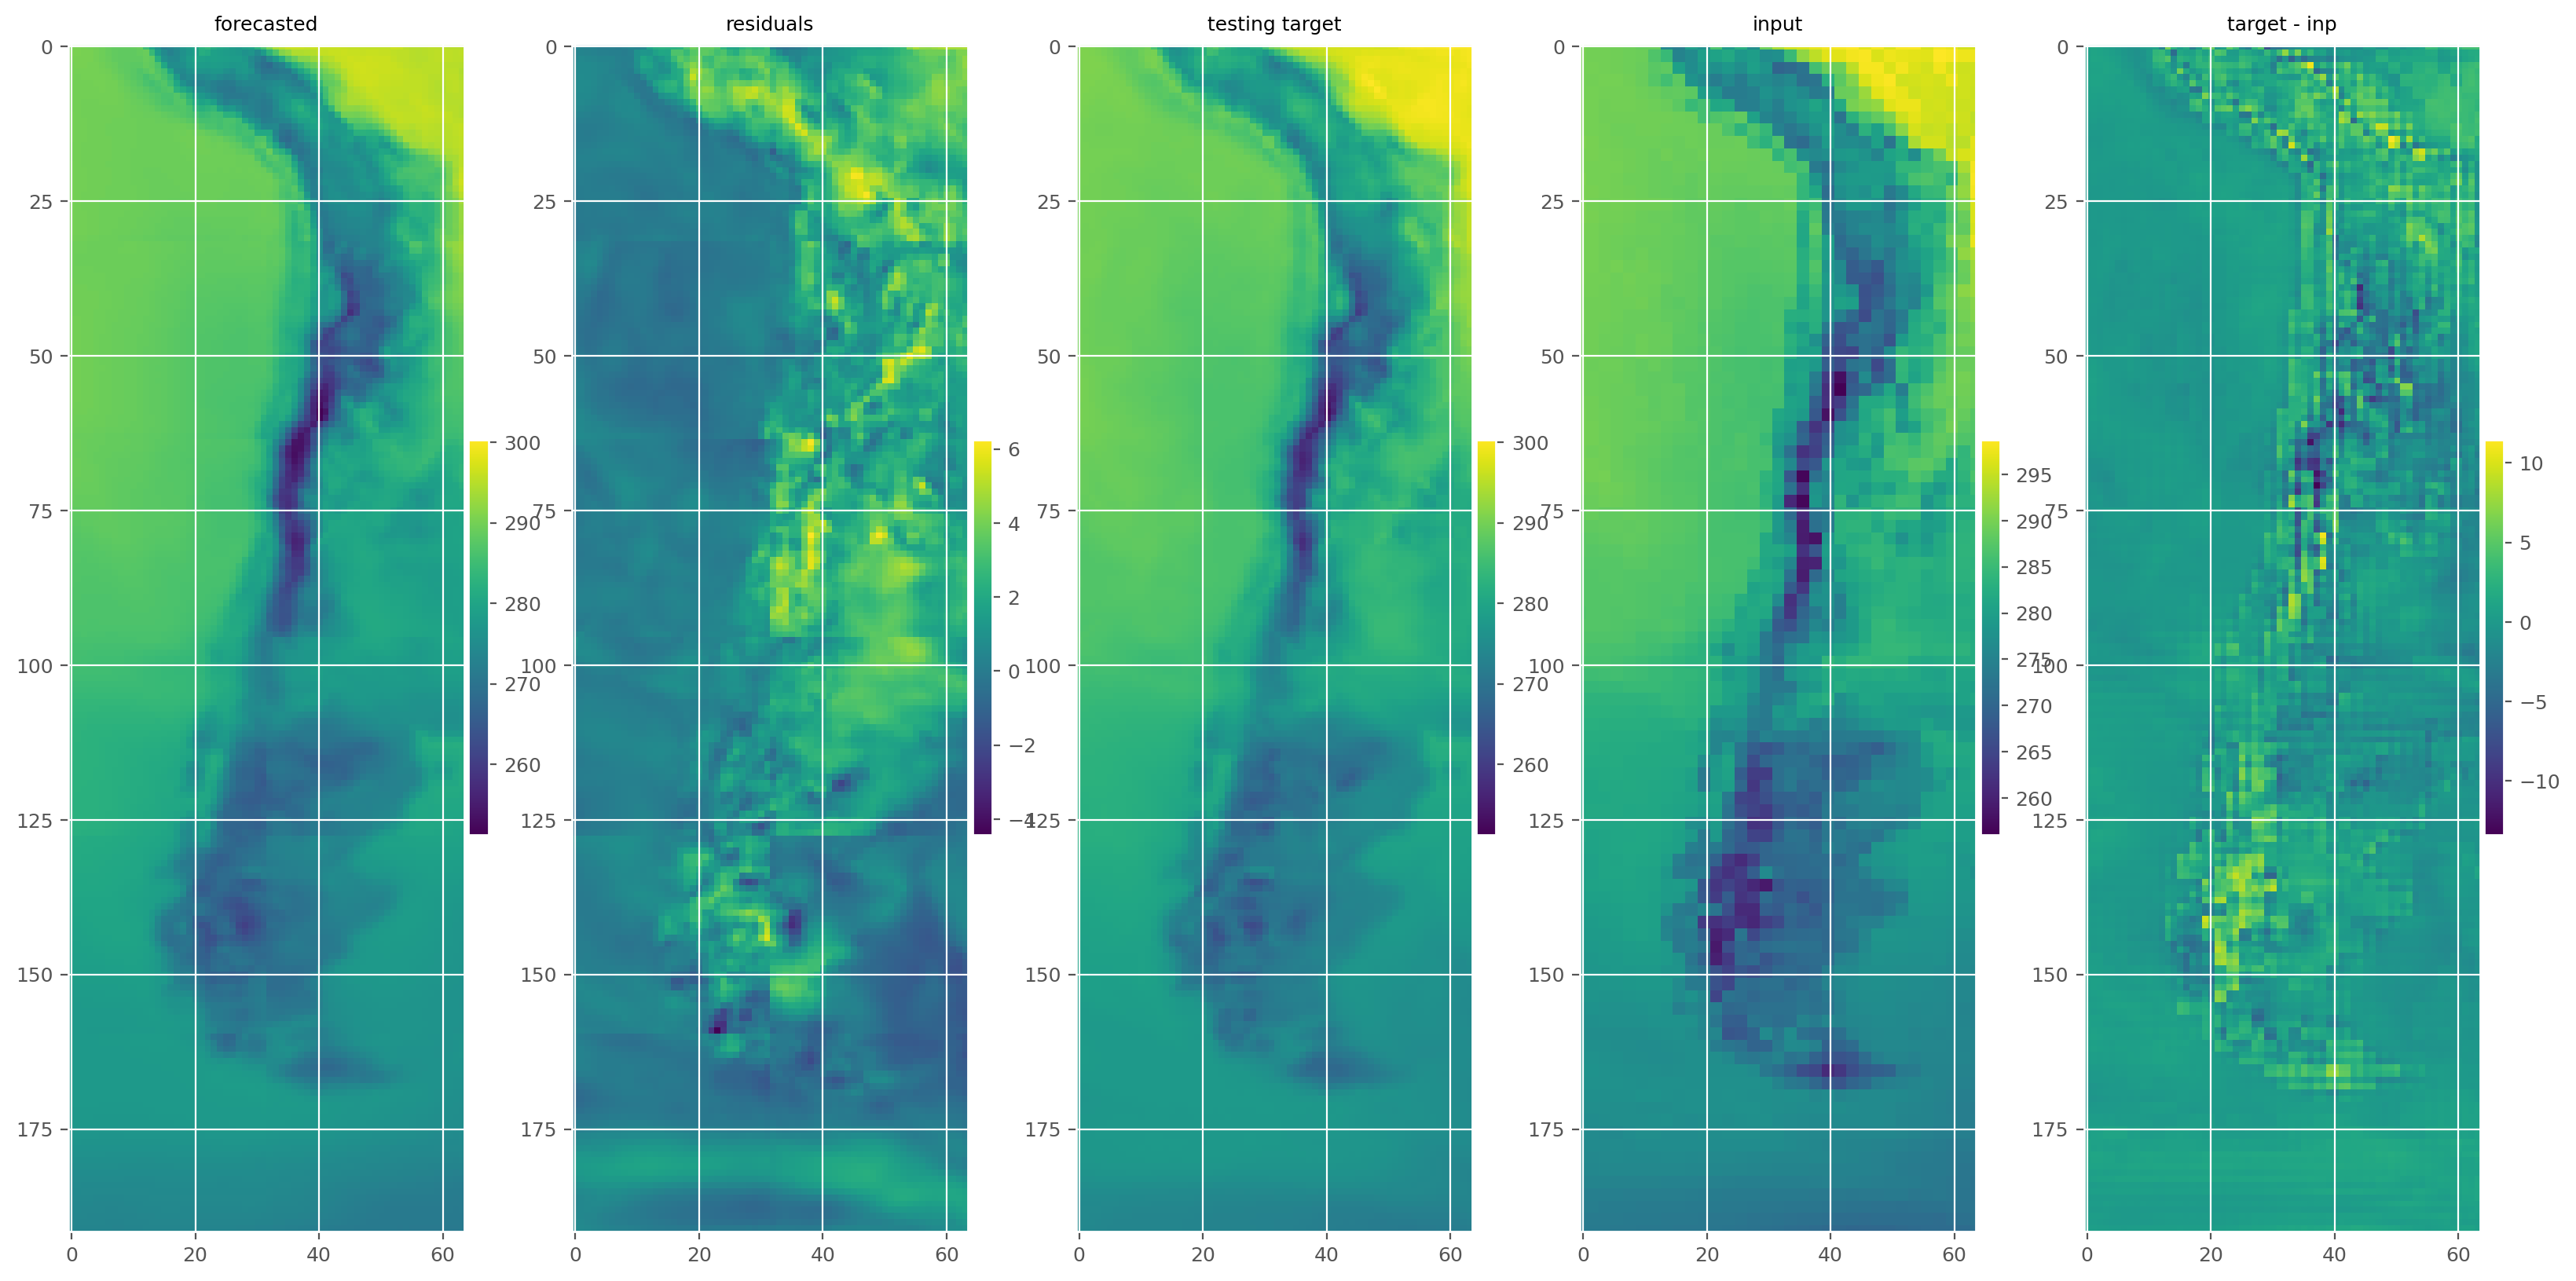

In [84]:
params = {'axes.titlesize':'9',
              'xtick.labelsize':'9',
              'ytick.labelsize':'9',
              'figure.figsize': (20,20),
              'figure.dpi': 200
              }
#plt.figure(figsize=[16,16])
plt.style.use('ggplot')
plt.rcParams.update(params)

i=4
plt.subplot(151) #131
p1 = plt.imshow(forecasted, vmin = np.min([forecasted, target]), vmax = np.max([forecasted, target]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('forecasted')

plt.subplot(152) #132
plt.imshow(residual, vmin = np.min(residual), vmax = np.max(residual))
plt.colorbar(orientation="vertical", fraction=0.047, pad=0.01)
plt.title('residuals')


plt.subplot(153) #132
plt.imshow(target, vmin = np.min([forecasted,target]), vmax = np.max([forecasted,target]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('testing target')

plt.subplot(154)
p1 = plt.imshow(inp,
                    vmin = np.min([inp]),
                    vmax = np.max([inp]))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('input')

plt.subplot(155) #132
plt.imshow(target - inp, vmin = np.min(target - inp), vmax = np.max(target - inp))
plt.colorbar(orientation="vertical",fraction=0.047, pad=0.01)
plt.title('target - inp')

#plt.savefig('grad_loss.png')
plt.show()

In [75]:
fore_stack - tf.expand_dims( observed_stack, axis=[4] )

<tf.Tensor: shape=(12, 3, 32, 32, 1), dtype=float32, numpy=
array([[[[[-2.32116699e-01],
          [-3.09234619e-01],
          [-3.15551758e-01],
          ...,
          [-4.75128174e-01],
          [-5.44006348e-01],
          [-7.70812988e-01]],

         [[-1.78283691e-01],
          [-1.99768066e-01],
          [-1.38946533e-01],
          ...,
          [-5.68237305e-01],
          [-6.15478516e-01],
          [-4.08905029e-01]],

         [[-2.52685547e-01],
          [-3.02520752e-01],
          [-2.92114258e-01],
          ...,
          [-9.05944824e-01],
          [-9.86846924e-01],
          [-8.00872803e-01]],

         ...,

         [[-7.59887695e-02],
          [-1.39129639e-01],
          [-7.86743164e-02],
          ...,
          [-3.70605469e-01],
          [-4.24102783e-01],
          [-5.36834717e-01]],

         [[-1.80664062e-01],
          [-1.25579834e-01],
          [-5.17883301e-02],
          ...,
          [-3.04199219e-01],
          [-3.97888184e-01],
 